In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/avocado-prices/avocado.csv


In [42]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
avocado = pd.read_csv('/kaggle/input/avocado-prices/avocado.csv')
avocado.head()
print(avocado.shape[0])
avocado.head()

18249


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Text(0.5, 1.0, 'Average Price of Shipment of Avocados versus Total Volume of Avocados')

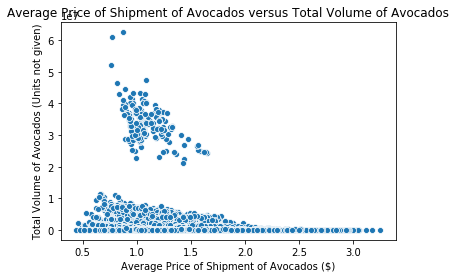

In [43]:
#Each of these entires represents the shipment of a particular type of avocado(conventional or organic) on any given day.
sns.scatterplot(avocado['AveragePrice'], avocado['Total Volume'])
plt.xlabel('Average Price of Shipment of Avocados ($)')
plt.ylabel('Total Volume of Avocados (Units not given)')
plt.title('Average Price of Shipment of Avocados versus Total Volume of Avocados')

Heteroskedacity is the idea of inconsistent variability of points on the scatterplot. Particularly, For lower values of the predictor(Average Price of Shipment of Avocados), there is quite a large variability of the response variable for, since there are volumes ranging from below a million all the way up to 6 million. However, as the values of the predictor increases, the lesser the variability, as total volumes tend to be low(close to 0), and consistently so. This scatterplot displays a negative (semi) linear association between the predictor and the response variable. However, judging based on the trends of points for lower values of the predictor, the points tend to follow a curved pattern to the likening of a 1/x curve stretched by a positive nonzero factor alpha. However, this does not apply to the whole plot.

In [44]:
avocado['type'].value_counts() #Conventional or organic

conventional    9126
organic         9123
Name: type, dtype: int64

In [45]:
avocado['region'].value_counts()

CincinnatiDayton       338
Chicago                338
DallasFtWorth          338
Columbus               338
California             338
StLouis                338
Louisville             338
Atlanta                338
Spokane                338
RaleighGreensboro      338
GreatLakes             338
Jacksonville           338
SanDiego               338
Portland               338
Midsouth               338
NorthernNewEngland     338
West                   338
MiamiFtLauderdale      338
Indianapolis           338
SanFrancisco           338
Northeast              338
Plains                 338
Roanoke                338
Seattle                338
LosAngeles             338
HarrisburgScranton     338
HartfordSpringfield    338
Charlotte              338
PhoenixTucson          338
BuffaloRochester       338
Boston                 338
NewYork                338
Sacramento             338
Southeast              338
Boise                  338
Orlando                338
BaltimoreWashington    338
A

In [46]:
average_price_per_region = avocado[['region', 'AveragePrice']].groupby('region', as_index = False).agg(np.mean)
average_price_per_region = average_price_per_region.sort_values('AveragePrice', ascending = False)
average_price_per_region

,region,AveragePrice
17,HartfordSpringfield,1.818639
42,SanFrancisco,1.804201
28,NewYork,1.727574
32,Philadelphia,1.632130
40,Sacramento,1.621568
7,Charlotte,1.606036
29,Northeast,1.601923
0,Albany,1.561036
8,Chicago,1.556775
37,RaleighGreensboro,1.555118


In [47]:
highest_price_row = average_price_per_region[average_price_per_region['AveragePrice'] == max(average_price_per_region['AveragePrice'])]
highest_price_row.iloc[0, 0]

'HartfordSpringfield'

In [48]:
lowest_price_row = average_price_per_region[average_price_per_region['AveragePrice'] == min(average_price_per_region['AveragePrice'])]
lowest_price_row.iloc[0, 0]

'Houston'

In [49]:
range_of_prices_across_regions = max(average_price_per_region['AveragePrice']) - min(average_price_per_region['AveragePrice'])

In [50]:
summary_statistics = average_price_per_region.describe()

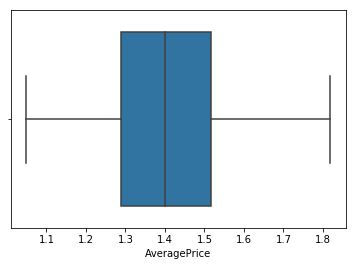

In [51]:
sns.boxplot('AveragePrice', data = average_price_per_region)
#Median is approximately equal to the mean, thus the distribution should be approxmiately normally distributed, also the Q2 - Q1 portion to the left of the median (lower 
#50% of the data) is approximately equal in size to the Q3 - Q2 portion of this box plot. No visible outliers.

#Median is approximately equal to the mean, thus the distribution should be approxmiately normally distributed, also the Q2 - Q1 portion to the left of the median (lower #50% of the data) is approximately equal in size to the Q3 - Q2 portion of this box plot. No visible outliers.

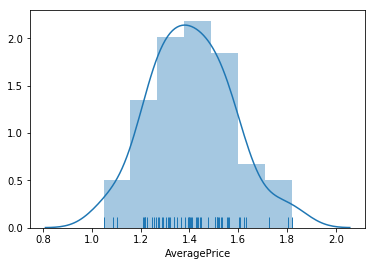

In [52]:
sns.distplot(average_price_per_region['AveragePrice'], kde = True, rug = True)

Text(0.5, 1.0, 'Average Price of Shipment of Avocados versus Total Volume of Avocados')

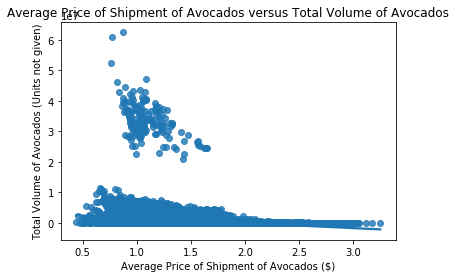

In [53]:
sns.regplot(avocado['AveragePrice'], avocado['Total Volume'])
plt.xlabel('Average Price of Shipment of Avocados ($)')
plt.ylabel('Total Volume of Avocados (Units not given)')
plt.title('Average Price of Shipment of Avocados versus Total Volume of Avocados')

#This line of best fit is extremely misleading

I am quite interested in understanding which features would be the most ideal for predicting whether a shipment of avocados is organic or conventional.
This may help companies automatically categorize their shipments as containing organic avocados or conventional avocados.

In [54]:
avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [55]:
avocado['type'].value_counts() #There are equal numbers of conventional and organic fruits in the sample. Let's proceed with caution and assume this is 
#representative of the original population(half of avocados are conventional and the other half are organic.).

conventional    9126
organic         9123
Name: type, dtype: int64

In [56]:
#Average Price per type
average_price_per_type = avocado[['type', 'AveragePrice']].groupby('type', as_index = False).agg(np.mean)
average_price_per_type

,type,AveragePrice
0,conventional,1.158040
1,organic,1.653999


In [57]:
average_volume_per_type = avocado[['type', 'Total Volume']].groupby('type', as_index = False).agg(np.mean)
average_volume_per_type

,type,Total Volume
0,conventional,1.653213e+06
1,organic,4.781121e+04


Now this is a potential confounding variable. Although the average price of organic avocados in organic avocado shipments is larger than the average price of conventional avocados in conventional avocado shipments, the average total volume demonstrates the opposite. The average total volumne of shipments of organic avocados is smaller by a factor of 10^2 on average in comparison to the average total volumne of shipments of conventional avocados. A more accurate test statistic to account for the volume differences would be the difference in the ratio between average price and total volume for conventional and organic respectively

Are organic avocados more expensive than conventional avocados on average in the population of avocados. Conducting an AB test will aid in the validation or rejection of this assumption.

Null Hypothesis: Conventional avocados cost the same on average per volume as Organic avocados in the population of avocados. Conventional Avocados and Organic avocados come from the same underlying distribution.

Alternative Hypothesis: Conventional avocados cost more on average per volume than Organic avocados do in the population of avocados. Conventional Avocados and Organic avocados come from different distributions.

In [58]:
observed_value = ((average_price_per_type['AveragePrice'][1]/average_volume_per_type['Total Volume'][1]) - 
                  (average_price_per_type['AveragePrice'][0]/average_volume_per_type['Total Volume'][0]))
observed_value

3.3893890616264415e-05

Text(0, 0.5, 'Percent per Difference in the ratio between average price of total volume for organic avocados and ratio between that of conventional ones')

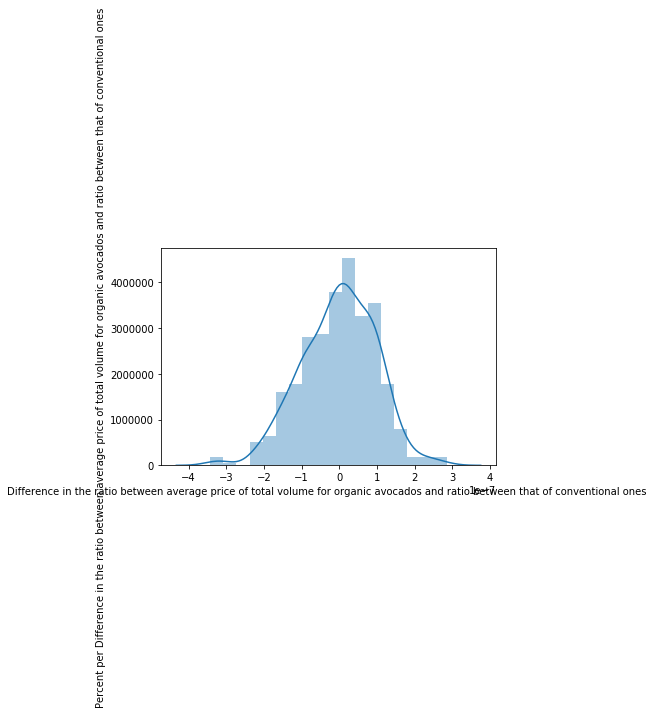

In [59]:
num_iterations = 500
simulated_test_statistic_values = np.empty(num_iterations)
for i in np.arange(num_iterations):
    shuffled_avocado = avocado.sample(len(avocado), replace = False).iloc[:, 11].to_frame().reset_index(drop=True)
    avocado['shuffled avocado'] = shuffled_avocado['type']
    average_price_per_type = avocado[['shuffled avocado', 'AveragePrice']].groupby('shuffled avocado', as_index = False).agg(np.mean)
    average_volume_per_type = avocado[['shuffled avocado', 'Total Volume']].groupby('shuffled avocado', as_index = False).agg(np.mean)
    simulated_test_statistic_value = ((average_price_per_type['AveragePrice'][1]/average_volume_per_type['Total Volume'][1]) - 
                  (average_price_per_type['AveragePrice'][0]/average_volume_per_type['Total Volume'][0]))
    simulated_test_statistic_values[i] = simulated_test_statistic_value
    
simulated_test_statistic_values = pd.Series(simulated_test_statistic_values)
sns.distplot(simulated_test_statistic_values, kde = True)
plt.xlabel("Difference in the ratio between average price of total volume for organic avocados and ratio between that of conventional ones ")
plt.ylabel("Percent per Difference in the ratio between average price of total volume for organic avocados and ratio between that of conventional ones")

In [60]:
p_value = np.count_nonzero(simulated_test_statistic_values.to_numpy() >= observed_value)/len(simulated_test_statistic_values.to_numpy())
p_value

0.0

With a small p-value of 0.0, which is less than the p-value cutoff of 0.05. We reject the null hypothesis. There is sufficient evidence to conclude that Conventional avocados cost more on average per volume squared than Organic avocados do in the population of avocados. Conventional Avocados and Organic avocados come from different distributions.

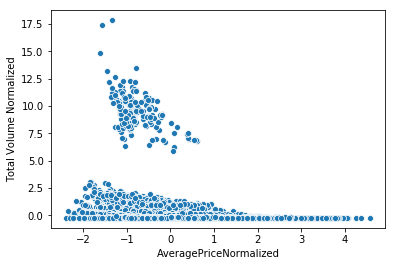

In [61]:
def normalize_average_price(row):
    return (row-np.mean(avocado['AveragePrice']))/np.std(avocado['AveragePrice'])
def normalize_total_volume(row):
    return (row-np.mean(avocado['Total Volume']))/np.std(avocado['Total Volume'])
avocado['AveragePriceNormalized'] = avocado['AveragePrice'].apply(normalize_average_price)
avocado['Total Volume Normalized'] = avocado['Total Volume'].apply(normalize_total_volume)
sns.scatterplot(x = avocado['AveragePriceNormalized'], y = avocado['Total Volume Normalized'])

In [62]:
#Model Development Phase
from sklearn.model_selection import train_test_split 
avocado['RatioNormalized'] = avocado['AveragePriceNormalized']/avocado['Total Volume Normalized']
_avocado = avocado.sample(1000, replace = False)[['type','RatioNormalized', 'AveragePriceNormalized']]
X = _avocado.iloc[:, 1:]
y = _avocado.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) #3:2 train test split


**K Nearest Neighbors Classifier**

In [63]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
print(neigh.predict(X_test))

['organic' 'conventional' 'conventional' 'conventional' 'conventional'
 'organic' 'organic' 'organic' 'organic' 'conventional' 'conventional'
 'conventional' 'organic' 'conventional' 'organic' 'organic' 'organic'
 'conventional' 'conventional' 'conventional' 'organic' 'conventional'
 'organic' 'conventional' 'organic' 'conventional' 'conventional'
 'organic' 'organic' 'conventional' 'organic' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional' 'organic'
 'organic' 'organic' 'organic' 'conventional' 'organic' 'organic'
 'conventional' 'organic' 'conventional' 'conventional' 'organic'
 'conventional' 'conventional' 'conventional' 'conventional' 'organic'
 'organic' 'organic' 'conventional' 'conventional' 'organic'
 'conventional' 'organic' 'conventional' 'organic' 'conventional'
 'organic' 'organic' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'organic' 'conventional' 'organic'
 'conventional' 'conventional' 'conventional' 'organic' 

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
training_scores = cross_val_score(neigh, X_train, y_train, cv=5)
testing_scores = cross_val_score(neigh, X_test, y_test, cv=5)
print(training_scores)
print(testing_scores)
average_cv_training1 = np.mean(training_scores)
average_cv_testing1 = np.mean(testing_scores)
average_cv_training1, average_cv_testing1

[0.81666667 0.775      0.81666667 0.76666667 0.78333333]
[0.8375 0.85   0.7875 0.825  0.775 ]


(0.7916666666666666, 0.8150000000000001)

**Logistic Regression Classifier**

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7966666666666666
0.8325


In [66]:
training_scores = cross_val_score(lr, X_train, y_train, cv = 10)
testing_scores = cross_val_score(lr, X_test, y_test, cv= 10)
print(training_scores)
print(testing_scores)
average_cv_training2 = np.mean(training_scores)
average_cv_testing2 = np.mean(testing_scores)
average_cv_training2, average_cv_testing2

[0.78333333 0.83333333 0.71666667 0.8        0.78333333 0.85
 0.75       0.83333333 0.83333333 0.8       ]
[0.8   0.95  0.875 0.825 0.825 0.9   0.775 0.85  0.8   0.825]


(0.7983333333333332, 0.8425)

**Decision Tree Classifier**

In [67]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.895


In [68]:
training_scores = cross_val_score(dt, X_train, y_train, cv = 10)
testing_scores = cross_val_score(dt, X_test, y_test, cv= 10)
print(training_scores)
print(testing_scores)
average_cv_training3 = np.mean(training_scores)
average_cv_testing3 = np.mean(testing_scores)
average_cv_training3, average_cv_testing3

[0.85       0.78333333 0.8        0.9        0.88333333 0.88333333
 0.9        0.86666667 0.83333333 0.8       ]
[0.825 0.9   0.975 0.825 0.875 0.925 0.875 0.875 0.825 0.85 ]


(0.85, 0.875)

**Gaussian Naive Bayesian Classifier**

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))

0.7
0.7375


In [70]:
training_scores = cross_val_score(gnb, X_train, y_train, cv = 10)
testing_scores = cross_val_score(gnb, X_test, y_test, cv= 10)
print(training_scores)
print(testing_scores)
average_cv_training4 = np.mean(training_scores)
average_cv_testing4 = np.mean(testing_scores)
average_cv_training4, average_cv_testing4

[0.71666667 0.65       0.7        0.71666667 0.61666667 0.8
 0.61666667 0.68333333 0.73333333 0.73333333]
[0.775 0.8   0.7   0.75  0.725 0.65  0.725 0.775 0.675 0.65 ]


(0.6966666666666667, 0.7225)

Random Forest Ensemble Model of Multiple Weak Learning Decision Trees

In [71]:
from sklearn.ensemble import RandomForestClassifier as RFC #Combining multiple weak learners(multiple decision trees) to make a strong learner(wisdom of the crowd)
rfc_b = RFC()
rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
y_pred

array(['conventional', 'organic', 'conventional', 'organic',
       'conventional', 'conventional', 'organic', 'conventional',
       'organic', 'conventional', 'organic', 'organic', 'organic',
       'organic', 'conventional', 'organic', 'conventional', 'organic',
       'conventional', 'organic', 'conventional', 'organic',
       'conventional', 'conventional', 'organic', 'conventional',
       'organic', 'conventional', 'conventional', 'organic', 'organic',
       'organic', 'organic', 'conventional', 'conventional', 'organic',
       'conventional', 'organic', 'conventional', 'conventional',
       'conventional', 'conventional', 'conventional', 'conventional',
       'conventional', 'conventional', 'conventional', 'conventional',
       'conventional', 'conventional', 'organic', 'conventional',
       'conventional', 'organic', 'conventional', 'organic',
       'conventional', 'organic', 'conventional', 'organic',
       'conventional', 'organic', 'conventional', 'conventional',
 

In [72]:
training_scores = cross_val_score(rfc_b, X_train, y_train, cv = 10)
testing_scores = cross_val_score(rfc_b, X_test, y_test, cv= 10)
print(training_scores)
print(testing_scores)
average_cv_training5 = np.mean(training_scores)
average_cv_testing5 = np.mean(testing_scores)
average_cv_training5, average_cv_testing5

[0.91666667 0.81666667 0.76666667 0.91666667 0.83333333 0.86666667
 0.88333333 0.85       0.9        0.78333333]
[0.775 0.925 0.975 0.85  0.875 0.9   0.85  0.925 0.85  0.75 ]


(0.8533333333333335, 0.8675)

Support Vector Machine

In [73]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7383333333333333
0.7725


In [74]:
training_scores = cross_val_score(clf, X_train, y_train, cv = 5)
testing_scores = cross_val_score(clf, X_test, y_test, cv= 5)
print(training_scores)
print(testing_scores)
average_cv_training6 = np.mean(training_scores)
average_cv_testing6 = np.mean(testing_scores)
average_cv_training6, average_cv_testing6

[0.70833333 0.76666667 0.75833333 0.69166667 0.74166667]
[0.8125 0.725  0.75   0.775  0.6625]


(0.7333333333333333, 0.745)

Text(0.5, 1.0, 'Model')

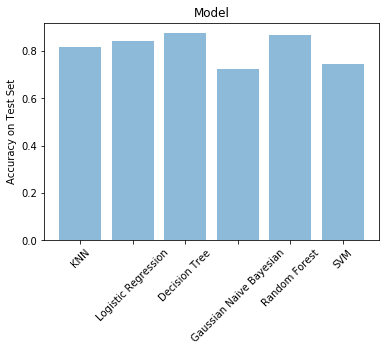

In [77]:
objects = ('KNN', 'Logistic Regression', 'Decision Tree', 'Gaussian Naive Bayesian', 'Random Forest', 'SVM')
y_pos = np.arange(len(objects))
performance = [average_cv_testing1, average_cv_testing2, average_cv_testing3, average_cv_testing4, average_cv_testing5, average_cv_testing6]
plt.bar(y_pos, performance, align='center', alpha=0.5) 
plt.xticks(y_pos, objects)
plt.xticks(rotation= 45)
plt.ylabel('Accuracy on Test Set')
plt.title('Model')

In conclusion, Decision Tree, Random Forest Ensemble, and Logistic Regression models received the highest accuracies of 0.875, 0.865, and 0.8425 respectively on the test set with k-fold cross validation accuracy of 10 as k, for predicting whether a shipment of avocados consists of conventional, or organic avocados. Thus, these models(after further testing with unseen data) will likely be used in a production environment. For instance, currently the average price for organic avocados is lower than that of conventional avocados. Additionally, organic avocado shipments volume is smaller by a 10^2 factor in comparison to conventional shipments volume on average, and these feature trends are potentially subject to change over time. We must proceed with caution however, as trends in conventional and organic avocado prices may change over time, and these models may be based on data that is not representative of current prices. Additionally, investigation into potential model drift over time should be examined, and should be trained with new and updated data. 